In [9]:
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [10]:
# Load the dataset
images, labels = galaxy10.load_data()

# Normalize pixel values
images = images.astype('float32') / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=10)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

C:\Users\ddaga\.astroNN\datasets\Galaxy10_DECals.h5 was found!


In [11]:
model_deep = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model_deep.summary()

d:\Projects\galaxy-classifier\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,375,882 (12.88 MB)

 Trainable params: 3,375,882 (12.88 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model_deep.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=2, mode='auto')

# model.fit(train_images[0:10000], train_labels[0:10000],    
#           batch_size=128,
#           epochs=10,
#           verbose=2,
#           validation_data=(test_images, test_labels),
#           callbacks=[monitor])

In [14]:
history_deep = model_deep.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels), callbacks=[monitor])


Epoch 1/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 200s 447ms/step - accuracy: 0.1572 - loss: 2.2210 - val_accuracy: 0.3382 - val_loss: 1.7447
Epoch 2/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 203s 457ms/step - accuracy: 0.3510 - loss: 1.7211 - val_accuracy: 0.4580 - val_loss: 1.4211
Epoch 3/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 192s 432ms/step - accuracy: 0.4805 - loss: 1.4059 - val_accuracy: 0.5321 - val_loss: 1.2409
Epoch 4/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 201s 452ms/step - accuracy: 0.5571 - loss: 1.2212 - val_accuracy: 0.5603 - val_loss: 1.1853
Epoch 5/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 203s 458ms/step - accuracy: 0.6176 - loss: 1.0703 - val_accuracy: 0.5795 - val_loss: 1.1459
Epoch 6/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 191s 430ms/step - accuracy: 0.6697 - loss: 0.9272 - val_accuracy: 0.6023 - val_loss: 1.1040
Epoch 7/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 185s 418ms/step - accuracy: 0.7147 - loss: 0.8088 - val_accuracy: 0.6164 - val_loss: 1.1373
Epoch 8/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 195s 439ms/step - accuracy: 0.7455 -

In [15]:
deep_eval = model_deep.evaluate(test_images, test_labels)
print(f'Deep CNN Test Accuracy: {deep_eval[1]}')


111/111 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - accuracy: 0.6056 - loss: 1.3113
Deep CNN Test Accuracy: 0.6051296591758728


111/111 ━━━━━━━━━━━━━━━━━━━━ 12s 102ms/step


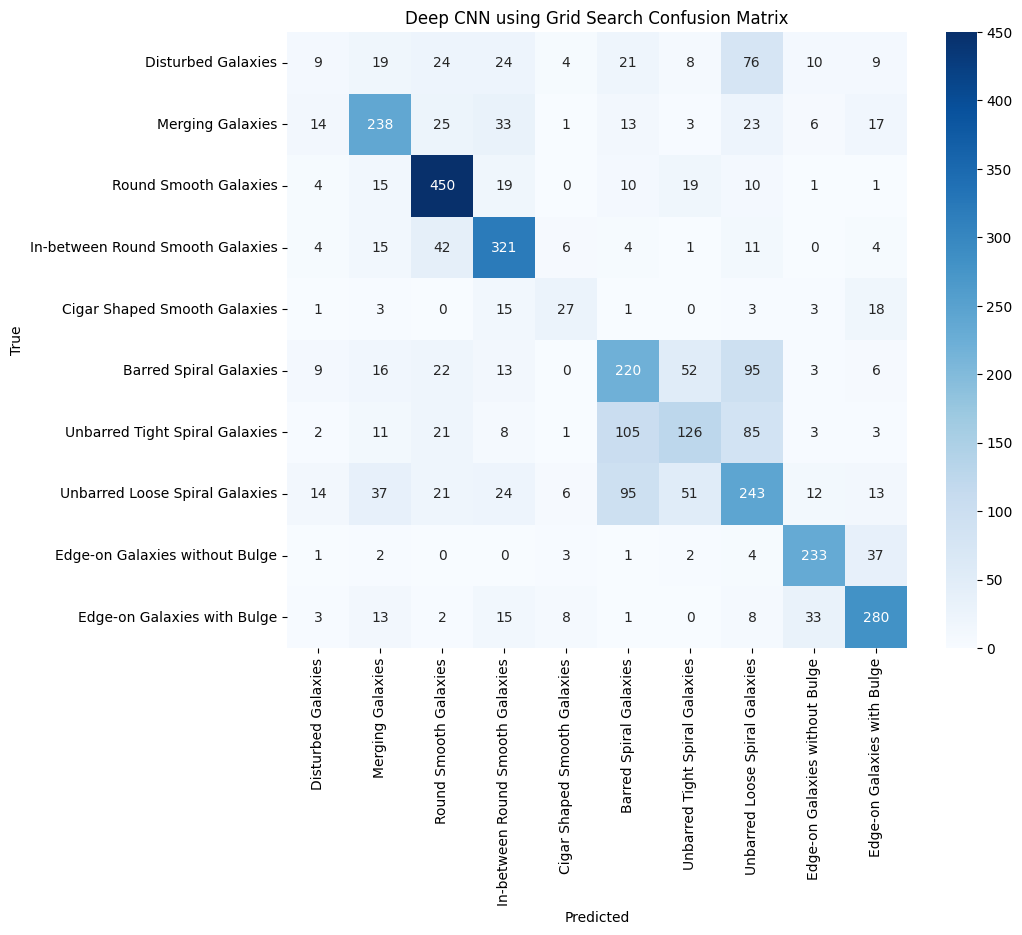

In [16]:
predictions = model_deep.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

galaxy_classes = [
    "Disturbed Galaxies",
    "Merging Galaxies",
    "Round Smooth Galaxies",
    "In-between Round Smooth Galaxies",
    "Cigar Shaped Smooth Galaxies",
    "Barred Spiral Galaxies",
    "Unbarred Tight Spiral Galaxies",
    "Unbarred Loose Spiral Galaxies",
    "Edge-on Galaxies without Bulge",
    "Edge-on Galaxies with Bulge"
]


# Assuming test_labels are one-hot encoded, get the true classes
true_classes = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=galaxy_classes, yticklabels=galaxy_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Deep CNN using Grid Search Confusion Matrix')
plt.show()